# Auteursherkenning

Geschiedkundigen vermoeden dat Heloisa vermoord werd door iemand die uit was op haar erfenis. In haar testament staan de volgende begunstigden: Hugo (de oudste zoon van Heloisa), Elisabet (de dochter van Heloisa), Johannes (de jongste zoon van Heloisa) en Gregorius (de kannunik van de lokale kerkgemeenschap). In de torenkamer van Heloisa werden verschillende briefwisselingen teruggevonden met elk van deze personen. De teksten van die brieven kan je terugvinden in de map *documenten*. 

Met behulp van deze notebook, kan je een taalkundige analyse doen op de teksten en zo proberen achterhalen wie mogelijks achter de dood van Heloisa zit.

## Voorkennis

Om met deze notebook aan de slag te gaan, heb je een basiskennis nodig van het Python programmeren. We gebruiken in deze notebook datatypes, operatoren, structuren en functies. Ben je niet zeker dat je voldoende Python kennis hebt voor deze notebook, dan kan je terecht op [dwengo.org/python_programming](https://dwengo.org/python_programming/). Daar worden alle basisprincipes stap voor stap uitgelegd.

## Stappen

Om de auteur van het testament te kunnen herkennen, zullen we de volgende stappen doorlopen. 

* **Lezen van de tekstbestanden**: De bestanden voor elke auteur opslaan in een variabele.
* **Lowercasing**: Alle hoofdlettertekens worden vervangen door kleine letters. Lowercasing is nodig omdat we gaan tellen hoeveel elk woord voorkomt en we het woord met en zonder hoofdletter op dezelfde manier willen tellen.
* **Tokenisering:**: Alle zinnen worden in betekenisvolle eenheden of 'tokens' gesplitst, zoals woorden en leestekens. Deze splitsing gebeurt op basis van de aanwezige spaties in de zinnen; daarom zullen de woorden van elkaar moeten gescheiden zijn door een spatie.
* **Filteren**: Om een vingerafdruk van de tekst te maken, kijken we enkel naar het gebruik van veelvoorkomende woorden (bv. de, het, u, uw, je, jij, ...). Woorden die niet vaak voorkopen filteren we dus weg uit de tekst.
* **Frequentie analyse**: Hier tellen we voor elke auteur hoe vaak deze bepaalde woorden gebruikt. Zo krijgen we een vingerafdruk van de tekst die we kunnen vergelijken met die van andere teksten.
* **Normaliseren**: Om ervoor te zorgen dat we teksten van verschillende lengte met elkaar kunnen vergelijken, normaliseren we de frequentie van elk woord.
* **Afstand bepalen**: Door de afstand te berekenen tussen de vingerafdruk van het testament en die van de verschillende auteurs, kunnen we achterhalen wie het testament geschreven heeft.

## Lezen van de tekstbestanden

Voor we onze analyse kunnen starten, lezen we de teksten van elke auteur in in een variabele. Deze variabelen zijn van het type String. 

In [1]:
# Importeer de nodige Python modules
import os

In [2]:
# Overloop de submappen in de map documenten.
# voor elke submap: lees de tekstbestanden in die map en voeg de inhoud samen tot een string.
# Sla die string op in een dictionary van auteurs.

# Deze functie leest de tekst in een bestand en geeft die terug als een string.
def lees_bestand(bestandsnaam):
    with open(bestandsnaam) as f:
        inhoud = f.read()
    return inhoud

# Deze functie leest de tekst in alle bestanden in een map en geeft die terug als een string.
def lees_bestanden_in_map(mapnaam):
    bestanden = os.listdir(mapnaam)
    inhoud = []
    for bestand in bestanden:
        if bestand.endswith(".txt"):
            inhoud.append(lees_bestand(mapnaam + "/" + bestand))
    return inhoud

# Deze functie overloopt de mappen met auteurs en leest alle teksten van die auteurs in.
def overloop_mappen_in_map(mapnaam):
    auteurs = {}
    mappen = os.listdir(mapnaam)
    for map in mappen:
        if os.path.isdir(mapnaam + "/" + map):
            auteurs[map] = lees_bestanden_in_map(mapnaam + "/" + map)
    return auteurs

In [3]:
# Lees de tekst in het bestand testament.txt
testament = lees_bestand("documenten/testament.txt")
# Lees de tekst voor elke auteurs in de map documenten en sla die op in een dictionary.
teksten_per_auteur = overloop_mappen_in_map("documenten")

# Voeg te teksten per auteur samen tot een grote string.
for auteur in teksten_per_auteur:
    teksten_per_auteur[auteur] = "\n".join(teksten_per_auteur[auteur])

print(testament)

for auteur in teksten_per_auteur:
    print(f'------------------------------------------- Auteur: {auteur} -------------------------------------------\n')
    print(teksten_per_auteur[auteur])
    print()
    


Testament van Barones Heloisa, Weduwe van Petrus Abaelardus

In de naam van de Almachtige God, Amen.

Ik, Heloisa, barones van het eerbiedwaardige huis Abaelardus, in volledig bewustzijn van mijn sterfelijkheid, stel dit testament op om mijn aardse bezittingen te verdelen zoals ik dat wens en mijn geweten rechtvaardig acht. Moge dit testament mijn diepste verlangens weerspiegelen, vastberaden en onomkeerbaar.

Als eerste daad van mijn nalatenschap verklaar ik dat de helft van mijn goudschatten, vergaard door jaren van toewijding, geschonken wordt aan de heilige kerk, ter ondersteuning van haar goddelijke missie op aarde, zodat haar werk van barmhartigheid en naastenliefde voort kan blijven bestaan.

Verder bepaal ik dat mijn geliefde oudste zoon, wiens trouw aan het huis Abaelardus onwrikbaar is gebleken, rechtmatig eigenaar wordt van ons eerbiedwaardige kasteel, waar hij de tradities van onze familie zal voortzetten en onze naam met eer zal dragen.

Aan mijn dierbare dochter, de bron

## Lowercasing

Hier vervangen we, in zowel het testament als de teksten van de verschillende auteurs, hoofdletters door kleine letters.

In [4]:
testament = testament.lower()
for auteur in teksten_per_auteur:
    teksten_per_auteur[auteur] = teksten_per_auteur[auteur].lower()

In [5]:
print(testament)
print(teksten_per_auteur["Elisabeth"])


testament van barones heloisa, weduwe van petrus abaelardus

in de naam van de almachtige god, amen.

ik, heloisa, barones van het eerbiedwaardige huis abaelardus, in volledig bewustzijn van mijn sterfelijkheid, stel dit testament op om mijn aardse bezittingen te verdelen zoals ik dat wens en mijn geweten rechtvaardig acht. moge dit testament mijn diepste verlangens weerspiegelen, vastberaden en onomkeerbaar.

als eerste daad van mijn nalatenschap verklaar ik dat de helft van mijn goudschatten, vergaard door jaren van toewijding, geschonken wordt aan de heilige kerk, ter ondersteuning van haar goddelijke missie op aarde, zodat haar werk van barmhartigheid en naastenliefde voort kan blijven bestaan.

verder bepaal ik dat mijn geliefde oudste zoon, wiens trouw aan het huis abaelardus onwrikbaar is gebleken, rechtmatig eigenaar wordt van ons eerbiedwaardige kasteel, waar hij de tradities van onze familie zal voortzetten en onze naam met eer zal dragen.

aan mijn dierbare dochter, de bron

## Tokenizering

Hier splitsen we elke tekst op in afzonderlijke woorden. Zo transformeren we elke tekst in een lijst van woorden.

In [6]:
testament = testament.split()
for auteur in teksten_per_auteur:
    teksten_per_auteur[auteur] = teksten_per_auteur[auteur].split()

In [7]:
print(testament)
print(teksten_per_auteur["Elisabeth"])

['testament', 'van', 'barones', 'heloisa,', 'weduwe', 'van', 'petrus', 'abaelardus', 'in', 'de', 'naam', 'van', 'de', 'almachtige', 'god,', 'amen.', 'ik,', 'heloisa,', 'barones', 'van', 'het', 'eerbiedwaardige', 'huis', 'abaelardus,', 'in', 'volledig', 'bewustzijn', 'van', 'mijn', 'sterfelijkheid,', 'stel', 'dit', 'testament', 'op', 'om', 'mijn', 'aardse', 'bezittingen', 'te', 'verdelen', 'zoals', 'ik', 'dat', 'wens', 'en', 'mijn', 'geweten', 'rechtvaardig', 'acht.', 'moge', 'dit', 'testament', 'mijn', 'diepste', 'verlangens', 'weerspiegelen,', 'vastberaden', 'en', 'onomkeerbaar.', 'als', 'eerste', 'daad', 'van', 'mijn', 'nalatenschap', 'verklaar', 'ik', 'dat', 'de', 'helft', 'van', 'mijn', 'goudschatten,', 'vergaard', 'door', 'jaren', 'van', 'toewijding,', 'geschonken', 'wordt', 'aan', 'de', 'heilige', 'kerk,', 'ter', 'ondersteuning', 'van', 'haar', 'goddelijke', 'missie', 'op', 'aarde,', 'zodat', 'haar', 'werk', 'van', 'barmhartigheid', 'en', 'naastenliefde', 'voort', 'kan', 'blijven

## Filteren

Om een fingerafdruk van een tekst te maken, gebruiken we enkel een vaste verzameling van veelvoorkomende woorden. In de volgende codecel, filteren we elke tekst en houden we enkel de woorden over die nuttig zijn voor de vingerafdruk.

In [8]:
vingerafdruk_woorden = ["de", "het", "een", "en", "in", "op", "van", "voor", "achter", "onder", "boven", "tussen", "tegen", "met", "zonder", "bij", "door", "naar", "uit", "over", "langs", "rond", "om", "naast", "binnen", "buiten", "ik", "jij", "u", "wij", "jullie", "zij", "mijn", "jouw", "uw", "zijn", "haar", "onze", "hun", "die", "dat", "wie", "wat", "welke", "men"]

testament = [woord for woord in testament if woord in vingerafdruk_woorden]
for auteur in teksten_per_auteur:
    teksten_per_auteur[auteur] = [woord for woord in teksten_per_auteur[auteur] if woord in vingerafdruk_woorden]

In [9]:
print(testament)
print(teksten_per_auteur["Elisabeth"])

['van', 'van', 'in', 'de', 'van', 'de', 'van', 'het', 'in', 'van', 'mijn', 'op', 'om', 'mijn', 'ik', 'dat', 'en', 'mijn', 'mijn', 'en', 'van', 'mijn', 'ik', 'dat', 'de', 'van', 'mijn', 'door', 'van', 'de', 'van', 'haar', 'op', 'haar', 'van', 'en', 'ik', 'dat', 'mijn', 'het', 'van', 'de', 'van', 'onze', 'en', 'onze', 'met', 'mijn', 'de', 'van', 'mijn', 'ik', 'het', 'over', 'onze', 'en', 'zij', 'met', 'en', 'en', 'onze', 'ik', 'mijn', 'van', 'in', 'het', 'de', 'voor', 'het', 'en', 'de', 'van', 'in', 'die', 'van', 'en', 'onze', 'wat', 'mijn', 'ik', 'dat', 'onder', 'mijn', 'een', 'van', 'mijn', 'en', 'voor', 'ik', 'met', 'mijn', 'en', 'op', 'van', 'in', 'het', 'van', 'die', 'mijn', 'en', 'mijn']
['het', 'u', 'over', 'het', 'van', 'onze', 'in', 'het', 'met', 'ik', 'dat', 'een', 'van', 'uit', 'onze', 'en', 'de', 'van', 'de', 'van', 'onze', 'van', 'een', 'onze', 'met', 'de', 'van', 'en', 'hun', 'en', 'een', 'voor', 'de', 'van', 'de', 'naar', 'onze', 'binnen', 'buiten', 'onze', 'en', 'onze', '

## Frequentie analyse

Nu we voor elke tekst enkel nog woorden over hebben die van belang zijn voor onze vingerafdruk, tellen we hoe vaak elk van deze woorden voorkomt in elke tekst.

In [10]:
# Bereken de frequentie van elk woord in het testament.
frequentie_testament = {}
for woord in vingerafdruk_woorden:
    frequentie_testament[woord] = testament.count(woord)
    
# Bereken de frequentie van elk woord in de teksten van elke auteur.
frequentie_per_auteur = {}
for auteur in teksten_per_auteur:
    frequentie_per_auteur[auteur] = {}
    for woord in vingerafdruk_woorden:
        frequentie_per_auteur[auteur][woord] = teksten_per_auteur[auteur].count(woord)

In [11]:
print(frequentie_testament)
print(frequentie_per_auteur["Elisabeth"])

{'de': 8, 'het': 6, 'een': 1, 'en': 12, 'in': 5, 'op': 3, 'van': 19, 'voor': 2, 'achter': 0, 'onder': 1, 'boven': 0, 'tussen': 0, 'tegen': 0, 'met': 3, 'zonder': 0, 'bij': 0, 'door': 1, 'naar': 0, 'uit': 0, 'over': 1, 'langs': 0, 'rond': 0, 'om': 1, 'naast': 0, 'binnen': 0, 'buiten': 0, 'ik': 7, 'jij': 0, 'u': 0, 'wij': 0, 'jullie': 0, 'zij': 1, 'mijn': 16, 'jouw': 0, 'uw': 0, 'zijn': 0, 'haar': 2, 'onze': 5, 'hun': 0, 'die': 2, 'dat': 4, 'wie': 0, 'wat': 1, 'welke': 0, 'men': 0}
{'de': 46, 'het': 15, 'een': 10, 'en': 38, 'in': 8, 'op': 5, 'van': 35, 'voor': 7, 'achter': 1, 'onder': 3, 'boven': 0, 'tussen': 0, 'tegen': 1, 'met': 16, 'zonder': 0, 'bij': 0, 'door': 2, 'naar': 1, 'uit': 2, 'over': 4, 'langs': 0, 'rond': 0, 'om': 5, 'naast': 0, 'binnen': 1, 'buiten': 1, 'ik': 12, 'jij': 0, 'u': 9, 'wij': 0, 'jullie': 0, 'zij': 0, 'mijn': 5, 'jouw': 0, 'uw': 11, 'zijn': 9, 'haar': 0, 'onze': 29, 'hun': 2, 'die': 7, 'dat': 6, 'wie': 0, 'wat': 0, 'welke': 0, 'men': 0}


## Normaliseren

Omdat het aantal woorden dat we tellen afhankelijk is van de lengte van de tekst is het moeilijk om teksten van verschillende lengte te vergelijken. Om toch teksten van verschillende lengte te kunnen vergelijken, kunnen we de frequentie van elk woord normaliseren. Normalisatie is een stap die heel vaak gebruikt wordt in AI systemen en nodig is om inputs op een gelijkaardig "niveau" te brengen. Hier normaliseren we het aantal voorkomens van een woord door het te delen door het totaal aantal woorden dat we geteld hebben.

In [12]:
# Deze functie normaliseert de frequentie van elk woord in een tekst.
def normaliseer(frequentie):
    som = sum(frequentie.values())
    for woord in frequentie:
        if som > 0:
            frequentie[woord] = frequentie[woord] / som
        else:
            frequentie[woord] = 0
    return frequentie

frequentie_testament = normaliseer(frequentie_testament)
for auteur in frequentie_per_auteur:
    frequentie_per_auteur[auteur] = normaliseer(frequentie_per_auteur[auteur])

In [13]:
print(frequentie_testament)
print(frequentie_per_auteur["Hugo"])
print(frequentie_per_auteur["Elisabeth"])

{'de': 0.07920792079207921, 'het': 0.0594059405940594, 'een': 0.009900990099009901, 'en': 0.1188118811881188, 'in': 0.04950495049504951, 'op': 0.0297029702970297, 'van': 0.18811881188118812, 'voor': 0.019801980198019802, 'achter': 0.0, 'onder': 0.009900990099009901, 'boven': 0.0, 'tussen': 0.0, 'tegen': 0.0, 'met': 0.0297029702970297, 'zonder': 0.0, 'bij': 0.0, 'door': 0.009900990099009901, 'naar': 0.0, 'uit': 0.0, 'over': 0.009900990099009901, 'langs': 0.0, 'rond': 0.0, 'om': 0.009900990099009901, 'naast': 0.0, 'binnen': 0.0, 'buiten': 0.0, 'ik': 0.06930693069306931, 'jij': 0.0, 'u': 0.0, 'wij': 0.0, 'jullie': 0.0, 'zij': 0.009900990099009901, 'mijn': 0.15841584158415842, 'jouw': 0.0, 'uw': 0.0, 'zijn': 0.0, 'haar': 0.019801980198019802, 'onze': 0.04950495049504951, 'hun': 0.0, 'die': 0.019801980198019802, 'dat': 0.039603960396039604, 'wie': 0.0, 'wat': 0.009900990099009901, 'welke': 0.0, 'men': 0.0}
{'de': 0.0, 'het': 0.011560693641618497, 'een': 0.0, 'en': 0.26011560693641617, 'in':

# Afstand bepalen

Hier bepalen we de euclidische afstand tussen de vingerafdruk voor elke auteur en de vingerafdruk van het testament om te bepalen welke auteur het testament geschreven heeft.

In [14]:
# Bereken de afstand tussen de frequenties van het testament en de frequenties van de teksten van elke auteur.
afstand_per_auteur = {}
for auteur in frequentie_per_auteur:
    afstand = 0
    for woord in vingerafdruk_woorden:
        afstand += abs(frequentie_testament[woord] - frequentie_per_auteur[auteur][woord])
    afstand_per_auteur[auteur] = afstand
    


In [15]:
# Druk de afstand van elk auteur tot het testament af.
for auteur in afstand_per_auteur:
    print(f'Auteur: {auteur}, Afstand: {afstand_per_auteur[auteur]}')

Auteur: Elisabeth, Afstand: 0.6823177163077132
Auteur: Gregorius, Afstand: 0.8835192379997494
Auteur: Hugo, Afstand: 0.8065014593944946
Auteur: Johannes, Afstand: 1.014824725715815


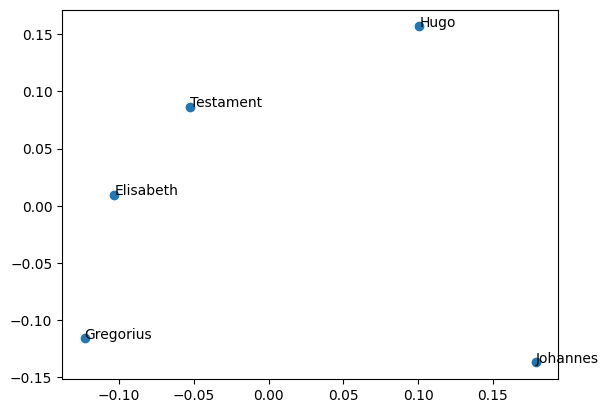

In [16]:
# Pas PCA toe op de frequenties van de woorden in de teksten van de auteurs.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
teksten = []
teksten.append(list(frequentie_testament.values()))
for auteur in frequentie_per_auteur:
    teksten.append(list(frequentie_per_auteur[auteur].values()))

    
pca.fit(teksten)
teksten_pca = pca.transform(teksten)

plt.scatter(teksten_pca[:, 0], teksten_pca[:, 1])
plt.text(teksten_pca[0, 0], teksten_pca[0, 1], "Testament")
for i, auteur in enumerate(frequentie_per_auteur):
    plt.text(teksten_pca[i+1, 0], teksten_pca[i+1, 1], auteur)
plt.show()



45
45


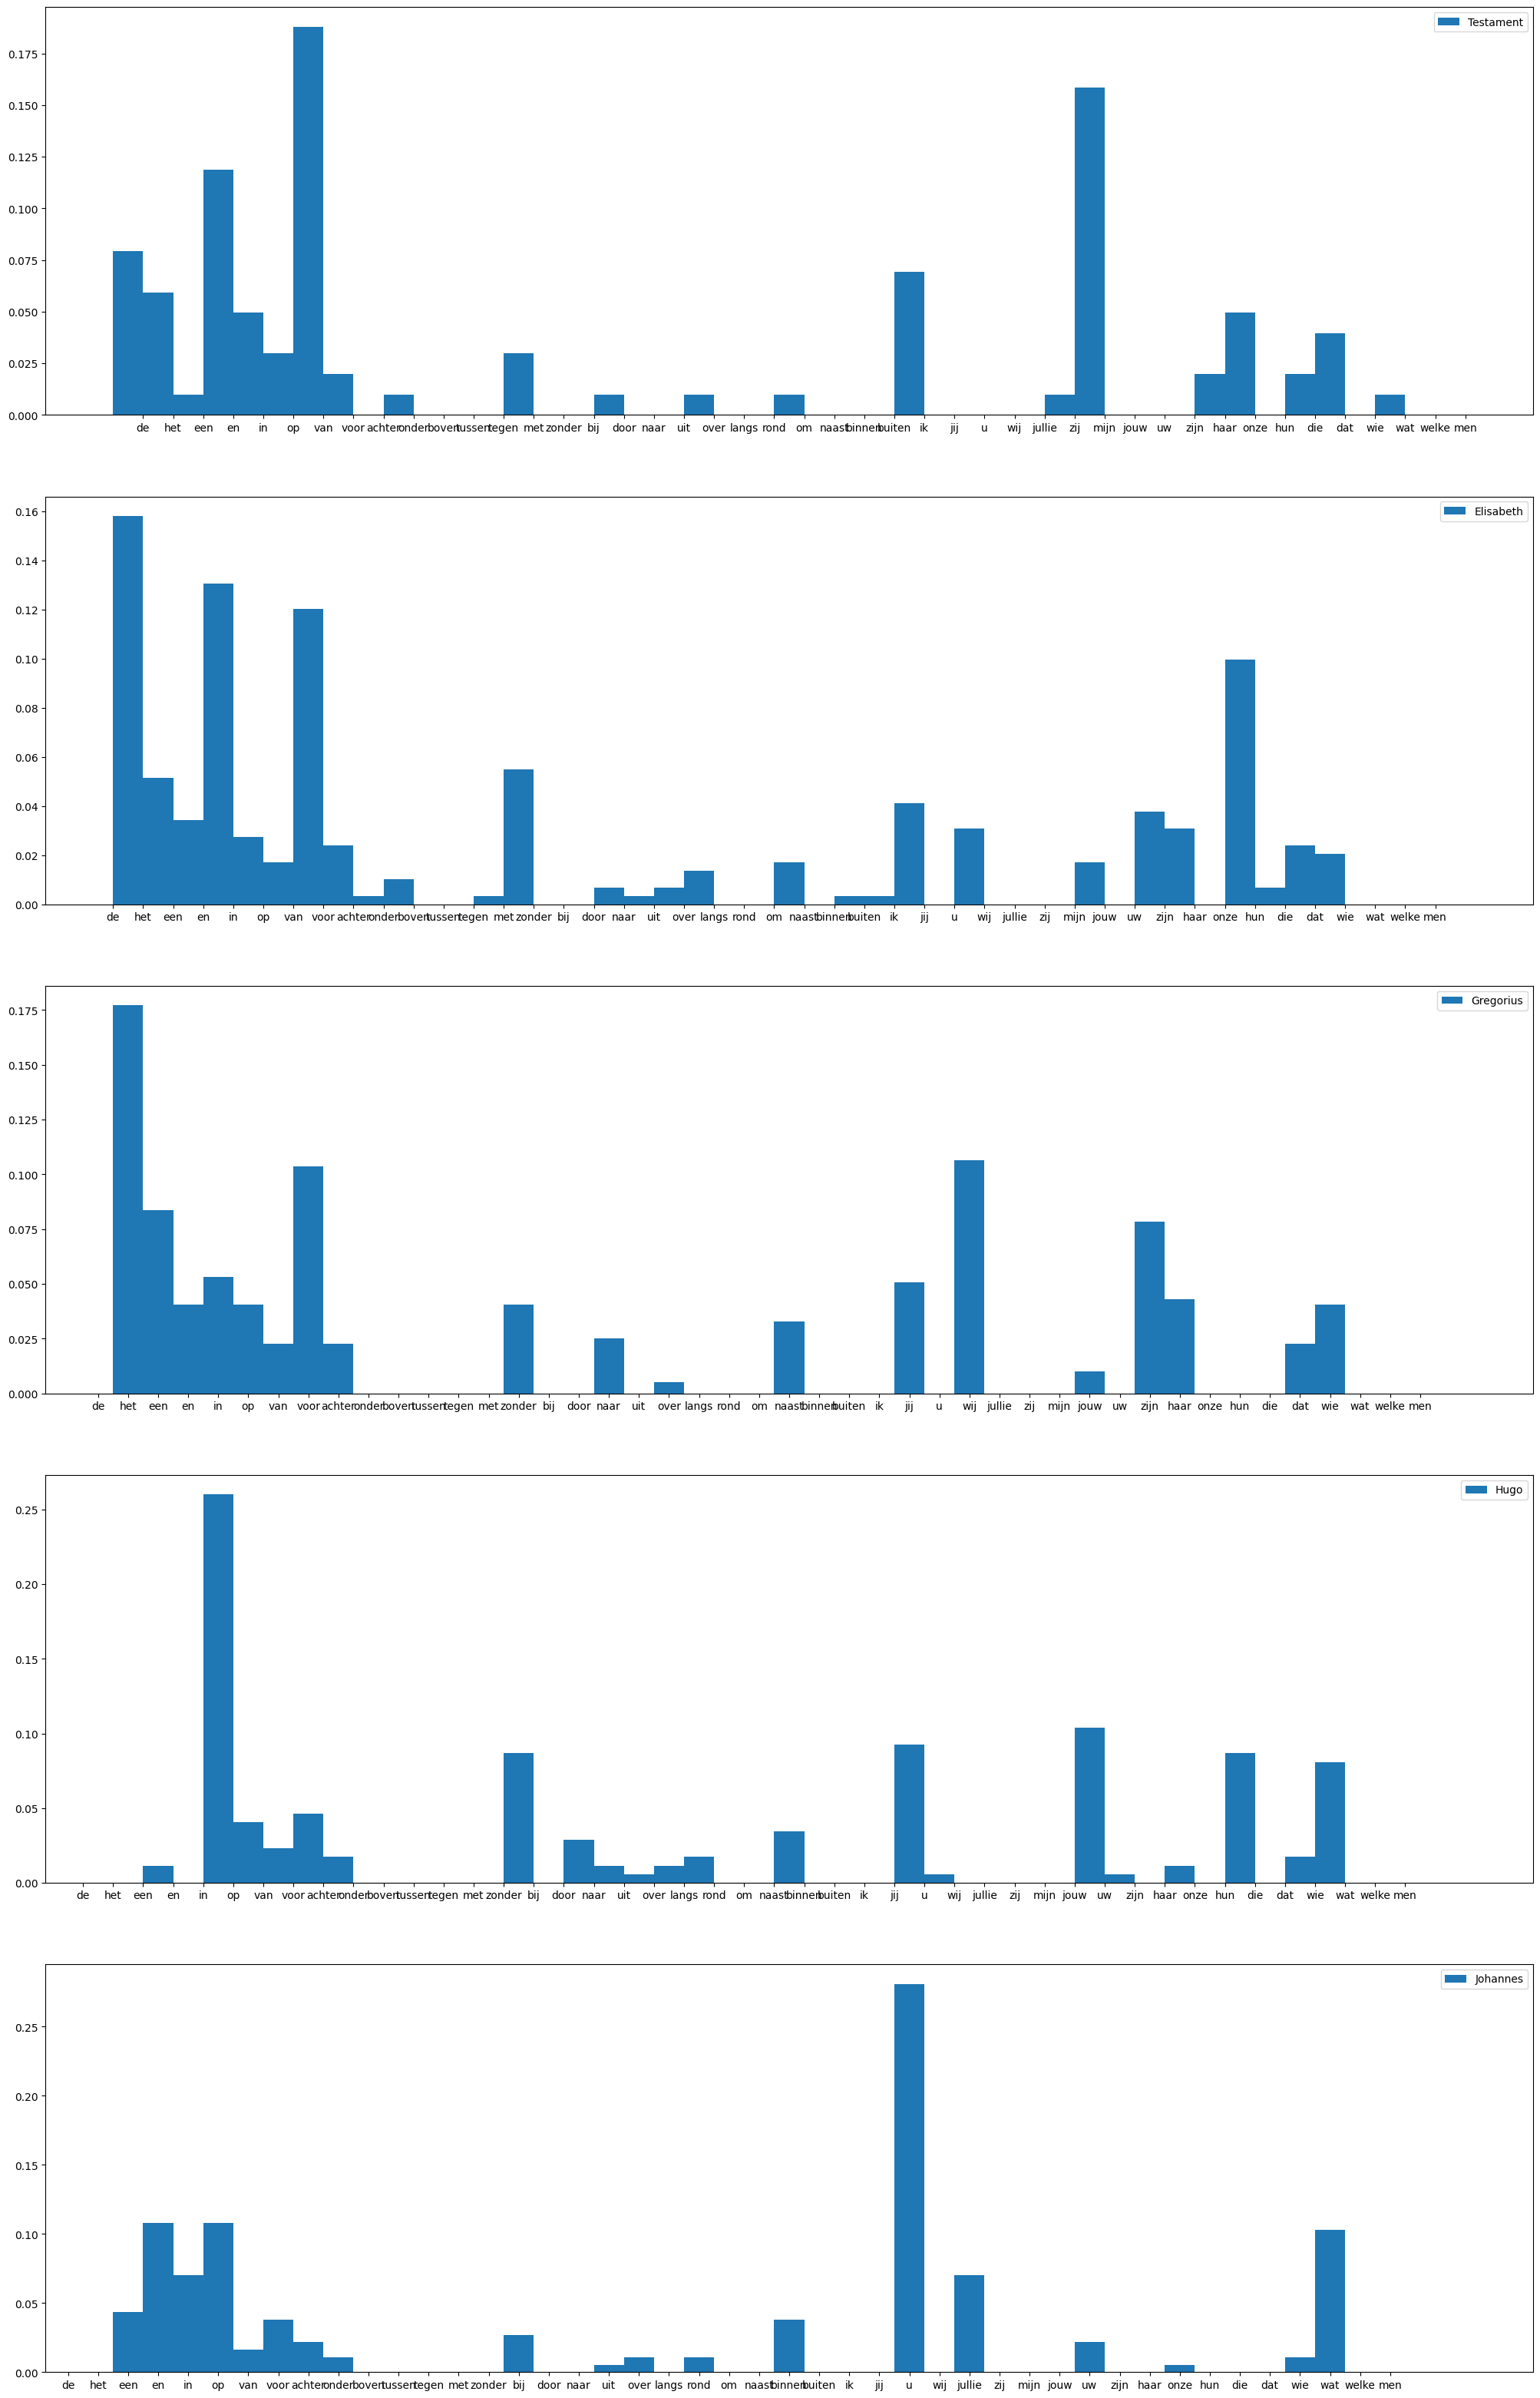

In [17]:
# Maak voor elke auteur en voor het testament een histogram van de frequenties van de woorden.
import numpy as np

print(len(vingerafdruk_woorden))
print(len(frequentie_testament))

x = np.arange(len(vingerafdruk_woorden))
breedte = 1

fig, ax = plt.subplots(5, 1, figsize=(25, 40))
rects_testament = ax[0].bar(x - breedte/2, list(frequentie_testament.values()), breedte, label='Testament')
ax[0].set_xticks(x)
ax[0].set_xticklabels(vingerafdruk_woorden)
ax[0].legend()
for i, auteur in enumerate(frequentie_per_auteur):
    ax[i+1].bar(x + (i+1) * breedte/2, list(frequentie_per_auteur[auteur].values()), breedte, label=auteur)
    ax[i+1].set_xticks(x)
    ax[i+1].set_xticklabels(vingerafdruk_woorden)
    ax[i+1].legend()
plt.show()


In [18]:
teksten_per_auteur = overloop_mappen_in_map("documenten")
print(teksten_per_auteur)
# Bepaal de vingerafdruk van elke tekst
vingerafdruk_woorden = ["de", "het", "een", "en", "in", "op", "van", "voor", "achter", "onder", "boven", "tussen", "tegen", "met", "zonder", "bij", "door", "naar", "uit", "over", "langs", "rond", "om", "naast", "binnen", "buiten", "ik", "jij", "u", "wij", "jullie", "zij", "mijn", "jouw", "uw", "zijn", "haar", "onze", "hun", "die", "dat", "wie", "wat", "welke", "men"]

print(teksten_per_auteur.keys())

frequenties_per_auteur = {}
for auteur in teksten_per_auteur.keys():
    teksten_per_auteur[auteur]
    frequenties_per_auteur[auteur] = []
    for index, tekst in enumerate(teksten_per_auteur[auteur]):
        tekst = tekst.lower()
        tekst = tekst.split()
        tekst = [woord for woord in tekst if woord in vingerafdruk_woorden]
        frequentie = {}
        for woord in vingerafdruk_woorden:
            frequentie[woord] = tekst.count(woord)
        frequentie = normaliseer(frequentie)
        frequenties_per_auteur[auteur].append(frequentie)
        

        
frequenties = []
labels = []
print(frequentie_testament.values())
frequenties.append(list(frequentie_testament.values()))
labels.append("Testament")
for auteur in frequentie_per_auteur:
    for frequentie in frequenties_per_auteur[auteur]:
        frequenties.append(list(frequentie.values()))
        labels.append(auteur)
        
print(len(frequenties))
print(len(labels))

{'Elisabeth': ['Geachte Barones Heloisa Abaelardus,\nMoeder,\n\nHet verheugt mij ten zeerste u te kunnen informeren over het ongekende succes van onze paardenfokkerij in het afgelopen jaar. Met grote vreugde kan ik mededelen dat we een recordaantal van 50 prachtige veulens hebben mogen verwelkomen, allen voortgekomen uit onze zorgvuldig geselecteerde fokmerries en de nobele hengsten van ons stal.\n\nNiet alleen hebben we kwantitatieve vooruitgang geboekt, maar ook de kwaliteit van onze paarden is van een uitzonderlijk niveau gebleken. Onze veulens tonen zich met trots als de belichaming van kracht, elegantie en nobelheid. Hun indrukwekkende bouw en temperament beloven een rooskleurige toekomst voor ons fokprogramma.\n\nDankzij deze buitengewone prestaties hebben we niet alleen de reputatie van ons huis hoog weten te houden, maar hebben we ook aanzienlijke winsten mogen behalen. De vraag naar onze paarden blijft gestaag groeien, zowel binnen als buiten onze grenzen, en onze financiÃ«le 

Tekst: Testament, Cluster: 0
Tekst: Elisabeth, Cluster: 0
Tekst: Elisabeth, Cluster: 0
Tekst: Elisabeth, Cluster: 3
Tekst: Elisabeth, Cluster: 0
Tekst: Elisabeth, Cluster: 0
Tekst: Gregorius, Cluster: 3
Tekst: Gregorius, Cluster: 3
Tekst: Gregorius, Cluster: 3
Tekst: Gregorius, Cluster: 3
Tekst: Gregorius, Cluster: 3
Tekst: Hugo, Cluster: 2
Tekst: Hugo, Cluster: 2
Tekst: Hugo, Cluster: 2
Tekst: Hugo, Cluster: 2
Tekst: Hugo, Cluster: 2
Tekst: Johannes, Cluster: 1
Tekst: Johannes, Cluster: 1
Tekst: Johannes, Cluster: 1
Tekst: Johannes, Cluster: 1
Tekst: Johannes, Cluster: 1


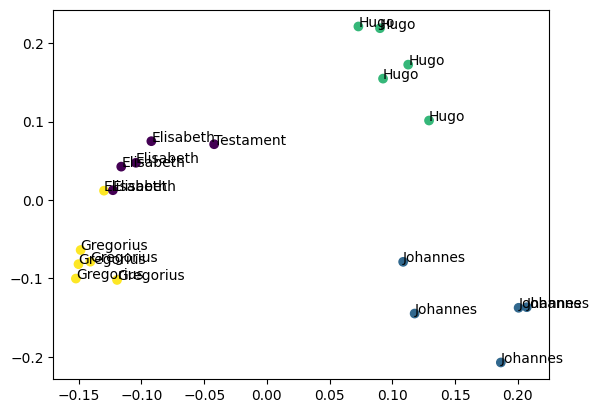

In [19]:
# Cluster de verschillende teksten van de auteurs en het testament.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(frequenties)

# Druk de clusters af.
for i, label in enumerate(labels):
    print(f'Tekst: {label}, Cluster: {kmeans.labels_[i]}')

# Druk de clusters af in een scatterplot.   
pca = PCA(n_components=2)
pca.fit(frequenties)
frequenties_pca = pca.transform(frequenties)

plt.scatter(frequenties_pca[:, 0], frequenties_pca[:, 1], c=kmeans.labels_)
for i, label in enumerate(labels):
    plt.text(frequenties_pca[i, 0], frequenties_pca[i, 1], label)
plt.show()


